# Inter-Track Group Project: Predicting Student's Academic Performance
*An Inter-Track Project by Group 4*

#### Introduction

Academic performance is the extent to which a student, teacher or institution has achieved their short or long-term educational goals. Cumulative GPA and completion of educational benchmarks such as secondary school diplomas and bachelor's degrees represent academic achievement -[Wikipedia](https://en.m.wikipedia.org/wiki/Academic_achievement).


Academic performance is the process of learning in an academic surroundings. Academic performance is seen to be the end result of the skills and intellectual abilities of a student in an academic surroundings. There is more to learning, it is more than Performance. Learning is defined as the expansion of a student’s knowledge and skills that result from instruction and experience in an academic environment. Performance also consist of a student’s ability to show that knowledge and skill in different settings and situations within and outside the classroom.
The Academic performance of students play an important role in the education system as well as the learning process. It is considered to be a major yardstick to judge one’s total potentialities and capacities Nuthana & Yenagi (2009), which are frequently measured by the examination results. It is used to pass judgment on the quality of education offered by academic institutions. 
Predicting students’ performance is mostly useful to help the educators and learners improving their learning and teaching process.


#### Data Description

The provided dataset was collected through the [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/predict+students+dropout+and+academic+success), the dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success. 


#### Aims and Objectives

Student’s performance is an essential part in academic institutions. This is because one of the criteria for any academic institution is based on its excellent record of academic achievements.  The aim and objectives will be to create a platform *Prolego* to bridge some gaps

The solution *Prolego* provides is to contribute to the reduction of academic dropout and failure in educational institutes by predicting student's academic performance including drop off rate, academic success, to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place, in order to help academicals institutes not only to focus more on bright students but also to initially identify students with low academic achievement and find ways to support them.




In [2]:
# importing required libraries 
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import missingno
import sklearn
from sklearn.decomposition import TruncatedSVD
import plotly.express as px
import warnings
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"
warnings.filterwarnings('ignore')

In [456]:
# loading and reading the datasets
# Using Pandas read_csv function to load .csv files and perform operations on it.
df = pd.read_csv('data (1).csv', delimiter=';')
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [4]:
# number of row in dataset
print("Student Perfomance Dataset Consists of {rows} rows".format(rows = len(df)))

Student Perfomance Dataset Consists of 4424 rows


In [358]:
# checking the number of rows and columns of dataset 
print("The Shape is: ", df.shape)

The Shape is:  (4424, 37)


#### What datatypes are in the datasets?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

In [5]:
# checking for the datatype of each feature of dataset
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [6]:
# checking the complete information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

#### *The Target Feature is the only variable having a text (object) data type in the dataset, others are float and integers. As such, before we can actually train a machine learning model on this data set, we will need to convert the text columns into numerical columns by applying the encoding method.*

#### *Therefore, we will separate our numerical and categorical columns using the select_dtypes method in Pandas to see which is which.*

In [19]:
# checking for all numerical columns i.e for integers and float
df_numerical = df.select_dtypes(exclude='object')

df_numerical.head()

,Marital_Status,Ap_Mode,Ap_Order,Course,Day_evening_att,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,...,Cur_U_1st_Sem_no_Eva,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [17]:
# checking for all categorical columns
df_categorical = df.select_dtypes(include='object')

df_categorical.head()

,SAP
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate


In [7]:
# displaying the names of all features of the dataset
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

#### Renaming Column

From the datasets, we can see that the names of the features are lenghty, hence need to be renamed for proper understanding and easy analysis.

In [457]:
# renaming column
df.columns = ['Marital_Status', 'Ap_Mode', 'Ap_Order', 'Course',
       'Attendance', 'Prev_Qua',
       'Prev_Qua_Grade', 'Nationality',
       'Mother_Qua', 'Father_Qua',
       'Mother_Occ', 'Father_Occ', 'Adm_Grade',
       'Displaced', 'Edu_Spec_Needs', 'Debtor',
       'Tui_Up_to_Date', 'Gender', 'S_Holder',
       'Age_at_Enroll', 'International',
       'Cur_U_1st_Sem_Credit',
       'Cur_U_1st_Sem_Enrol',
       'Cur_U_1st_Sem_Eva',
       'Cur_U_1st_Sem_Appr',
       'Cur_U_1st_Sem_Grade',
       'Cur_U_1st_Sem_no_Eva',
       'Cur_U_2nd_Sem_Credit',
       'Cur_U_2nd_Sem_Enrol',
       'Cur_U_2nd_Sem_Eva',
       'Cur_U_2nd_Sem_Approved',
       'Cur_U_2nd_Sem_Grade',
       'Cur_U_2nd_Sem_no_Eva', 'Unmp_R',
       'Inf_R', 'GDP', 'SAP']

In [459]:
# displaying the summary statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Ap_Mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Ap_Order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Prev_Qua,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Prev_Qua_Grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nationality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother_Qua,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father_Qua,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


<AxesSubplot:>

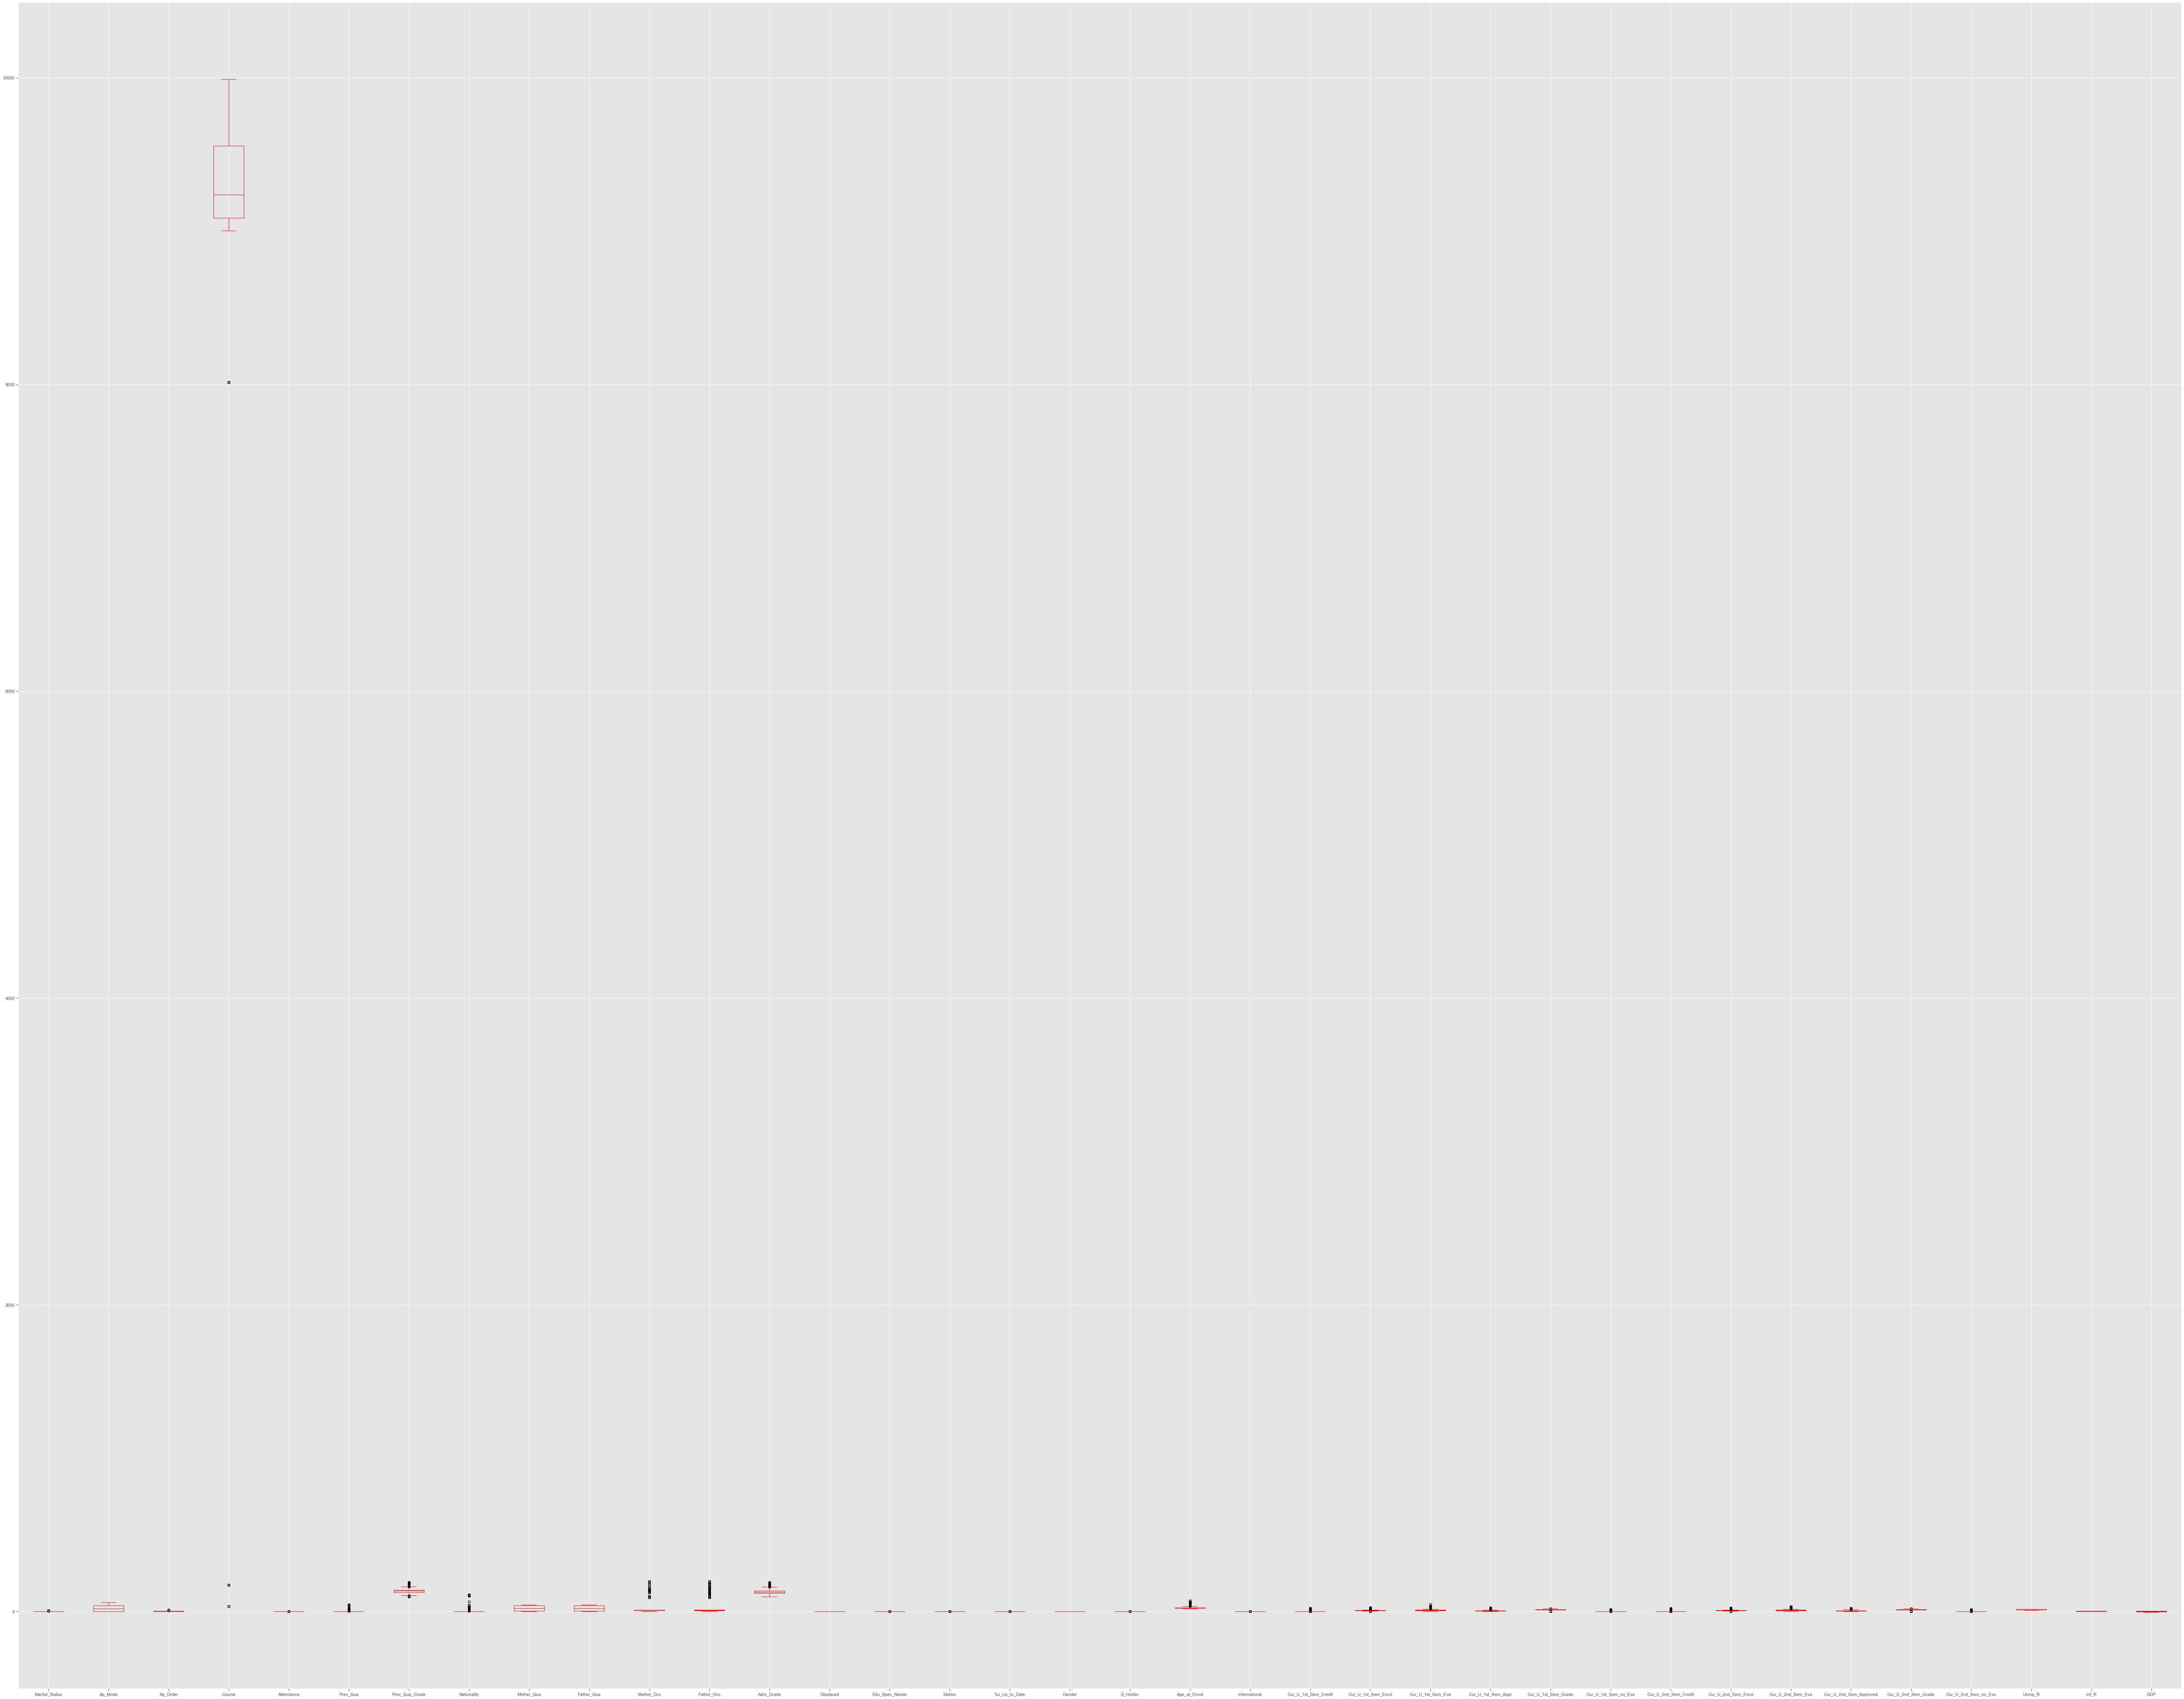

In [458]:
df.boxplot(figsize=(100,80), color = 'red')

#### What missing values are there?

Visualise missing values early is so important as it shows where the major holes in the dataset are. Knowing this information helps with EDA and also figuring out what kind of data cleaning and preprocessing is needed.

In [460]:
# checking for missing values
df.isnull().sum()

Marital_Status            0
Ap_Mode                   0
Ap_Order                  0
Course                    0
Attendance                0
Prev_Qua                  0
Prev_Qua_Grade            0
Nationality               0
Mother_Qua                0
Father_Qua                0
Mother_Occ                0
Father_Occ                0
Adm_Grade                 0
Displaced                 0
Edu_Spec_Needs            0
Debtor                    0
Tui_Up_to_Date            0
Gender                    0
S_Holder                  0
Age_at_Enroll             0
International             0
Cur_U_1st_Sem_Credit      0
Cur_U_1st_Sem_Enrol       0
Cur_U_1st_Sem_Eva         0
Cur_U_1st_Sem_Appr        0
Cur_U_1st_Sem_Grade       0
Cur_U_1st_Sem_no_Eva      0
Cur_U_2nd_Sem_Credit      0
Cur_U_2nd_Sem_Enrol       0
Cur_U_2nd_Sem_Eva         0
Cur_U_2nd_Sem_Approved    0
Cur_U_2nd_Sem_Grade       0
Cur_U_2nd_Sem_no_Eva      0
Unmp_R                    0
Inf_R                     0
GDP                 

<AxesSubplot:>

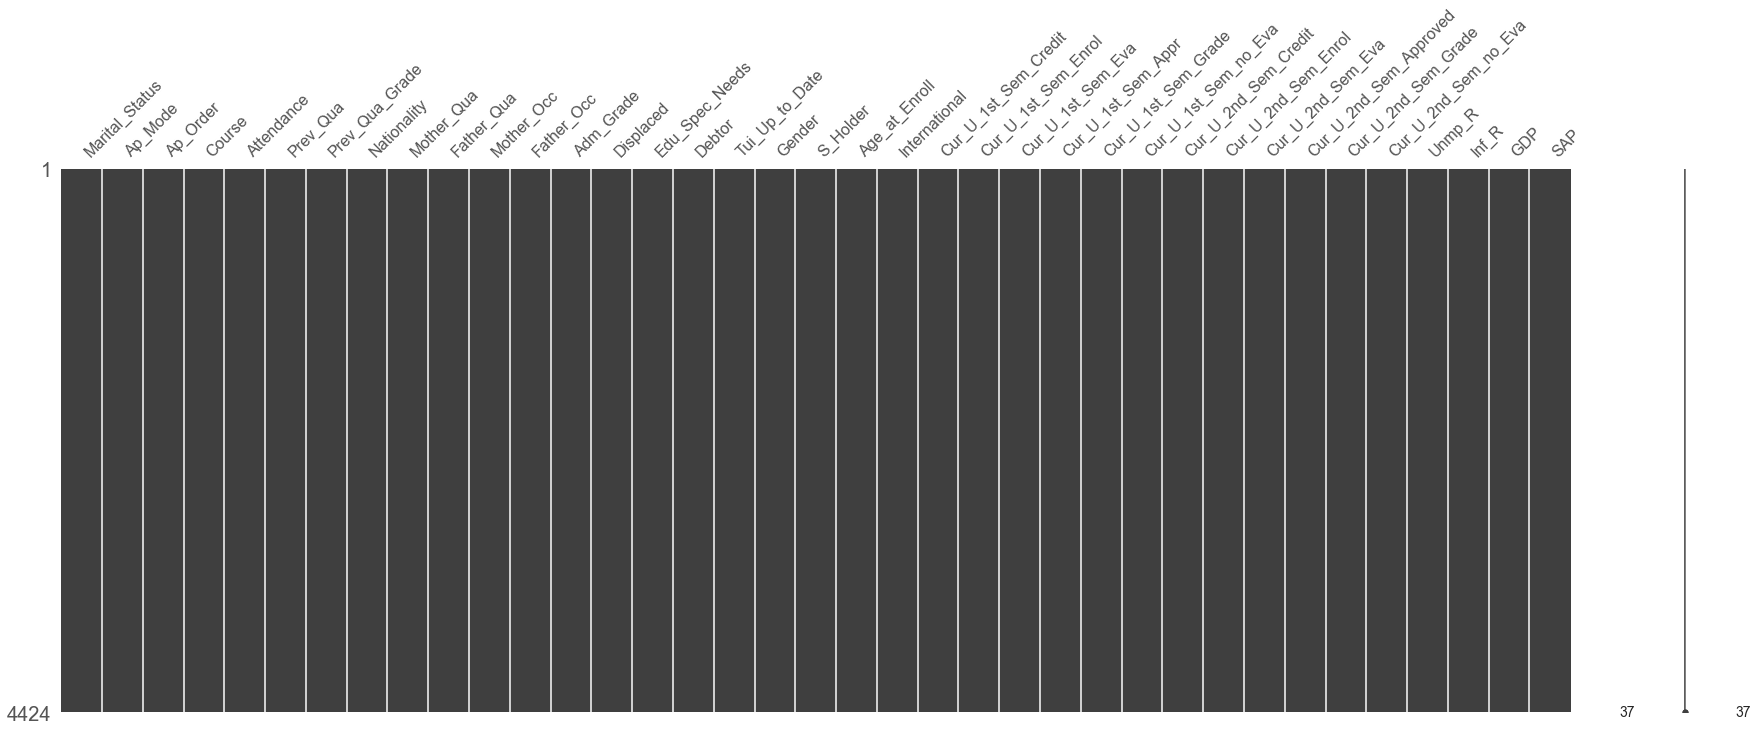

In [461]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

### Inference

There is no Missing data in the dataset.

In [13]:
# checking for duplicates in the dataset
df.duplicated().sum()

0

## *Univariate Analysis*

#### Target Feature: SAP = Student Academic Performance

Description: Whether the students Enrolled, Graduated or Dropout.

This is the variable we want our machine learning model to predict based off all the others.

In [325]:
# What kind of values are in Student Academic Performance?
df.SAP.value_counts() 

Graduate    2209
Dropout     1421
Enrolled     794
Name: SAP, dtype: int64

#### *Since we are only concerned about students who dropout and student who graduate, we do not need the Enrolled class hence it would be dropped.*

In [462]:
# we want to ommit the information from the SAP column that does not concern our analysis. 
df["SAP"] = df.SAP.apply(lambda x: 1 if x == "Dropout" else 0)

In [463]:
df.SAP.value_counts() 

0    3003
1    1421
Name: SAP, dtype: int64

where 0 represents students who are graduate, 1 represents students who dropout

Text(0.5, 1.0, 'Distribution of Student who are Graduates and Dropouts')

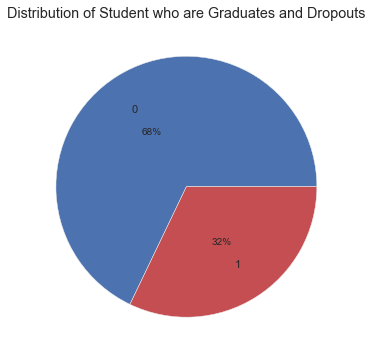

In [329]:
# How many Students Graduated or Dropout?
plt.figure(figsize=(6,6))
plt.pie(x=[3003, 1421], labels=['0','1'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','r'])
plt.title('Distribution of Student who are Graduates and Dropouts')

### *Inference*

The distribution plot shows that students who are graduates are 68% and students who dropped out are 32%. Also the plot reveals tha the dataset is not unbalanced, so there would no need for any tecnique used to balance the dataset.

#### Feature: Marital_Status
Description: Marital Status of students.

In [59]:
# What kind of values are in Marital_Status?
df.Marital_Status.value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital_Status, dtype: int64

In [60]:
# what are the Marital Status categories?
df['Marital_Status'].unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

*The Marital Status column of the dataset has many categories and we need to reduce the categories for a better modelling. so it will be reduced to unmarried and married. where 1 reps students who are unmarried and 2 reps students who are married.*

In [464]:
df['Marital_Status']=np.where(df['Marital_Status'] ==4, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==5, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==6, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==3, 2, df['Marital_Status'])

In [465]:
df['Marital_Status'].unique()

array([1, 2], dtype=int64)

In [127]:
df.Marital_Status.value_counts()

1    3919
2     505
Name: Marital_Status, dtype: int64

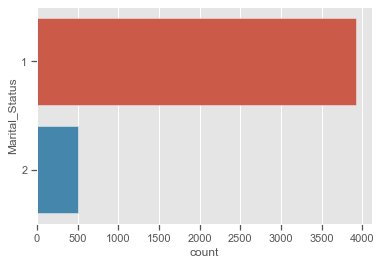

In [65]:
# What do the counts look like?
sns.countplot(y='Marital_Status', data=df);

### *Inference*

From the plot it is shown that Students with the unmarried class is more than Students who are married.

#### Feature: Ap_Mode = Application Mode
Description: the various means through which a candidate may be admitted into the degree programme. 

In [154]:
df.Ap_Mode.value_counts() 

1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
26       1
57       1
27       1
Name: Ap_Mode, dtype: int64

*The Ap_Mode column of the dataset has many categories and we need to reduce the categories for a better modelling. so it will be reduced to popular and not popular. where 1 reps students with popular Ap_Mode and 2 reps students with unpolpular Ap_Mode*.

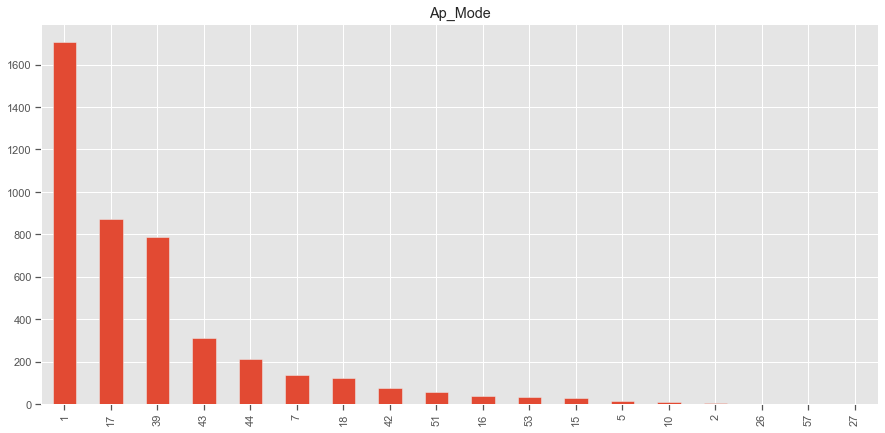

In [270]:
# ploting the bar chart for Ap_Mode
data['Ap_Mode'].value_counts().plot(kind = "bar", title = 'Ap_Mode', figsize=(15, 7))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Ap_Order = Application Order
Description: the various order through which a candidate may be admitted into the degree programme.

In [156]:
df.Ap_Order.value_counts() 

1    3026
2     547
3     309
4     249
5     154
6     137
0       1
9       1
Name: Ap_Order, dtype: int64

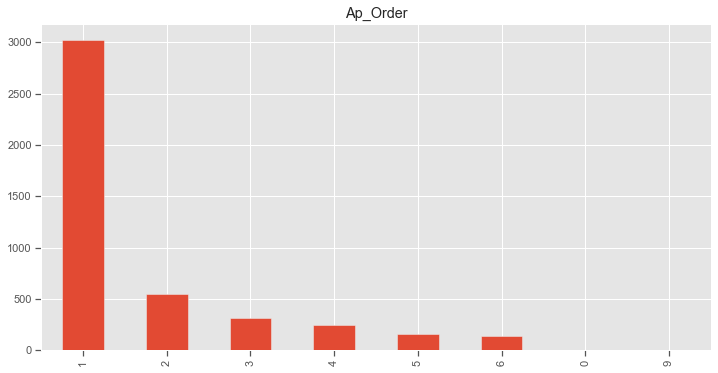

In [272]:
# ploting the bar chart for Ap_Order
data['Ap_Order'].value_counts().plot(kind = "bar", title = 'Ap_Order', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Course
Description: The program in which students are admitted to. For analysis sake, we assume that the course stands for the programme related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies, etc.

In [39]:
df.Course.value_counts() 

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
8014    215
171     215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

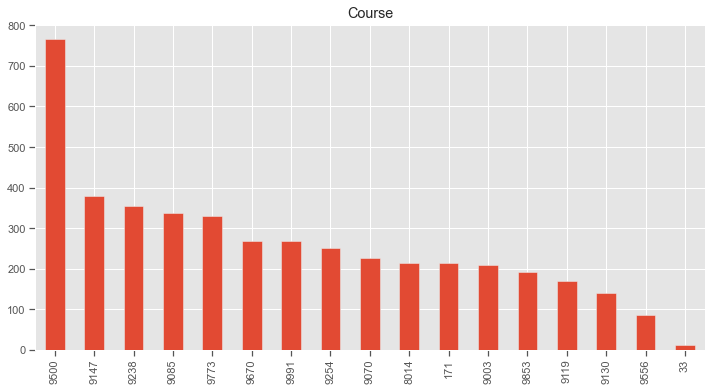

In [273]:
# ploting the bar chart for Course
data['Course'].value_counts().plot(kind = "bar", title = 'Course', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

From the bar chart, it is shown that the highest degree programme represented by 9500 has 766 students enrolled in it followed by the others. However, the course with the lowest number of of student is represented by 33, which have only 12 students enrolled in it.

#### Feature: Attendance = Day_evening_attendance
Description: Attendance taken for daytime students and evening students. For analysis sake, we assume that 1 represents the Day students and 0 represents the Evening students.

In [276]:
df.Attendance.value_counts() 

1    3941
0     483
Name: Attendance, dtype: int64

Text(0.5, 1.0, 'Distribution of Student for Daytime and Evening Attendance')

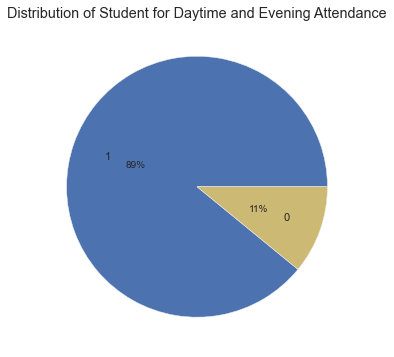

In [79]:
plt.figure(figsize=(6,6))
plt.pie(x=[3941, 483], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','y'])
plt.title('Distribution of Student for Daytime and Evening Attendance')

### *Inference*

From the above pie plot, it is shown that students with Day attendance are more than those who attend in the evening. Where 89% of students are seen to be day attendance and 11% are Evening.

####  Feature: Prev_Qua = Previous_Qualification
Description: Previous Qualification of students.

In [160]:
df.Prev_Qua.value_counts() 

1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
14       1
5        1
Name: Prev_Qua, dtype: int64

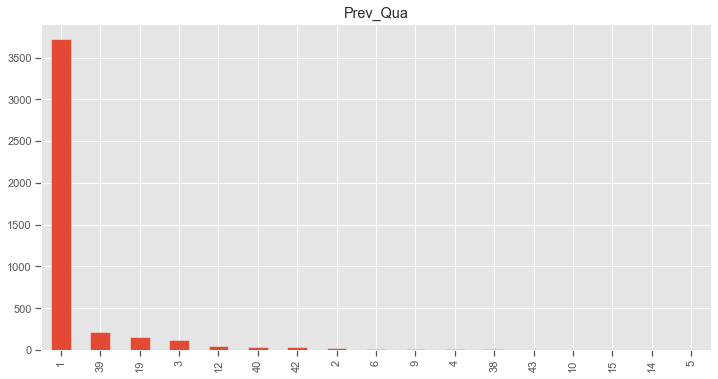

In [274]:
# ploting the bar chart for Prev_Qua
data['Prev_Qua'].value_counts().plot(kind = "bar", title = 'Prev_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

We can see from graph that 3717 are students who have the 1-class type of previous qualification and this is more compared to the rest.



##### Feature: Prev_Qua_Grade = Previous_Qualification_Grade
Description: Previous Qualification Grade of students.

In [162]:
df.Prev_Qua_Grade.value_counts() 

133.1    491
130.0    375
140.0    336
120.0    278
150.0    162
        ... 
138.6      1
169.0      1
117.4      1
140.8      1
188.0      1
Name: Prev_Qua_Grade, Length: 101, dtype: int64

#### Feature: Nationality
Description: The country of students.

Where 1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian

In [53]:
df.Nationality.value_counts() 

1      4314
41       38
26       14
22       13
6        13
24        5
11        3
103       3
100       3
25        2
21        2
105       2
2         2
62        2
101       2
32        1
109       1
17        1
14        1
13        1
108       1
Name: Nationality, dtype: int64

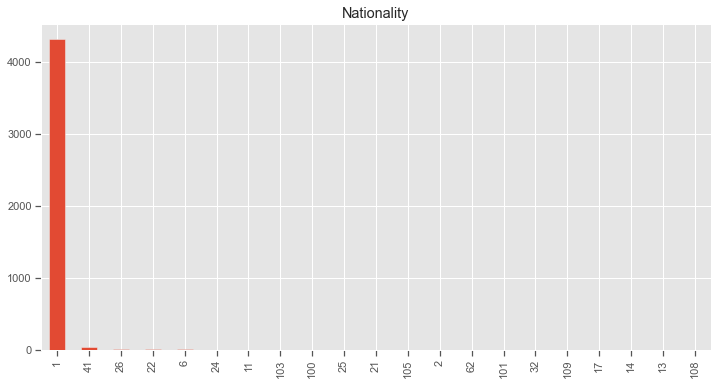

In [276]:
# ploting the bar chart for Nationality
data['Nationality'].value_counts().plot(kind = "bar", title = 'Nationality', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

We can see from the plot that students from 1 - Portuguese; are more than students from other nation.


#### Feature: Mother_Qua = Mother_Qualification
Description:  Mother's Qualification of students.

In [165]:
df.Mother_Qua.value_counts() 

1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
39       8
9        8
41       6
42       4
43       4
6        4
30       3
10       3
29       3
11       3
35       3
36       3
14       2
22       1
26       1
18       1
44       1
27       1
Name: Mother_Qua, dtype: int64

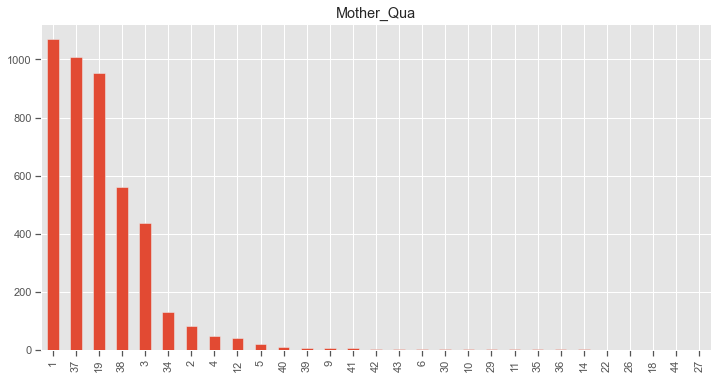

In [278]:
# ploting the bar chart for Mother_Qua
data['Mother_Qua'].value_counts().plot(kind = "bar", title = 'Mother_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Father_Qua = Father_Qualification
Description:  Father's Qualification of students.

In [166]:
df.Father_Qua.value_counts() 

37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
14       4
30       4
22       4
29       3
26       2
35       2
10       2
6        2
41       2
43       2
18       1
42       1
33       1
25       1
13       1
27       1
31       1
44       1
20       1
Name: Father_Qua, dtype: int64

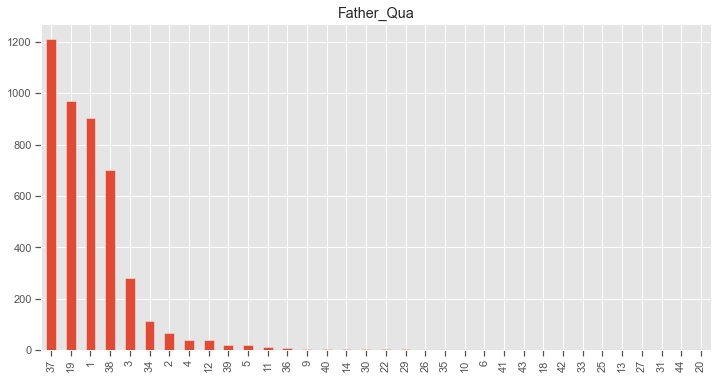

In [279]:
# ploting the bar chart for Father_Qua
data['Father_Qua'].value_counts().plot(kind = "bar", title = 'Father_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Mother_Occ =  Mother_Occupation
Description: The Mother's Occupation of students.

In [167]:
df.Mother_Occ.value_counts()

9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
175       5
192       5
10        4
193       4
134       4
132       3
143       3
151       3
122       2
152       2
153       2
125       1
173       1
131       1
171       1
Name: Mother_Occ, dtype: int64

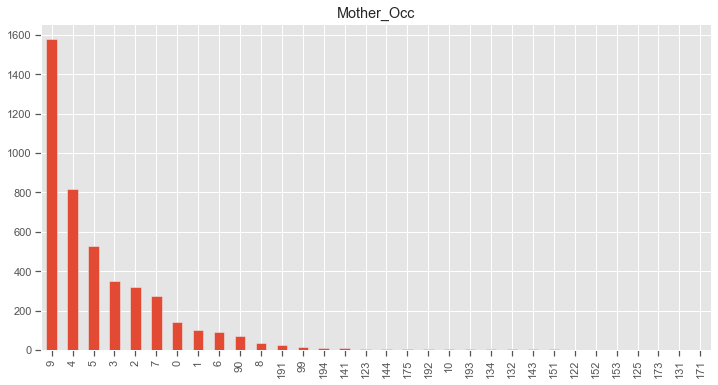

In [280]:
# ploting the bar chart for Mother_Occ
data['Mother_Occ'].value_counts().plot(kind = "bar", title = 'Mother_Occ', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Father_Occ = Father_Occupation
Description: The Father's Occupation of students.

In [171]:
df.Father_Occ.value_counts()

9      1010
7       666
5       516
4       386
3       384
8       318
10      266
6       242
2       197
1       134
0       128
90       65
99       19
193      15
171       8
144       8
192       6
163       5
175       4
103       4
135       3
183       3
181       3
152       3
123       3
194       2
182       2
151       2
122       2
102       2
172       2
112       2
131       1
143       1
174       1
124       1
101       1
154       1
134       1
114       1
132       1
161       1
153       1
141       1
121       1
195       1
Name: Father_Occ, dtype: int64

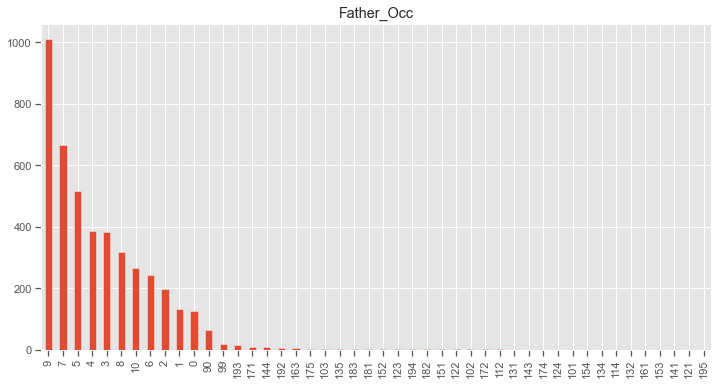

In [281]:
# ploting the bar chart for Father_Occ
data['Father_Occ'].value_counts().plot(kind = "bar", title = 'Father_Occ', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Adm_Grade = Admission_Grade
Description: The Admission_Grade of students.

In [172]:
df.Adm_Grade.value_counts()

130.0    162
140.0    153
120.0    145
100.0    116
150.0     81
        ... 
98.5       1
164.3      1
173.3      1
155.8      1
103.8      1
Name: Adm_Grade, Length: 620, dtype: int64

<AxesSubplot:xlabel='Adm_Grade', ylabel='Density'>

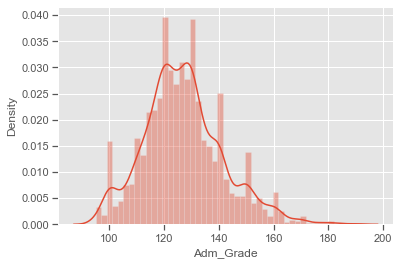

In [174]:
# ploting the distribution for Adm_Grade
sns.distplot(df.Adm_Grade)

#### Feature: Displaced
Description:  Students who are forced to flee their homes and consequently their schools for various reasons. For this analysis, we will assume 1 to represents students with the not-Displaced class and 0 to represents students with the Displaced class.

In [66]:
df.Displaced.value_counts()

1    2426
0    1998
Name: Displaced, dtype: int64

Text(0.5, 1.0, 'Distribution of Displaced Student')

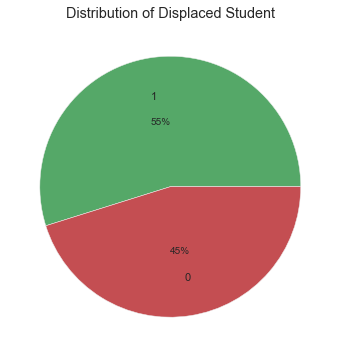

In [80]:
plt.figure(figsize=(6,6))
plt.pie(x=[2426, 1998], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['g','r'])
plt.title('Distribution of Displaced Student')

### *Inference*

We can see from the plot that students who are not displaced is 56% and those who are is 45%


#### Feature: Edu_Spec_Needs = Educational_Special_Needs 
Description:  Students who have learning problems or disabilities. For this analysis, we will assume 0 to represents students with the special needs class and 1 to represents students with the non-special needs class.

In [178]:
df.Edu_Spec_Needs.value_counts()

0    4373
1      51
Name: Edu_Spec_Needs, dtype: int64

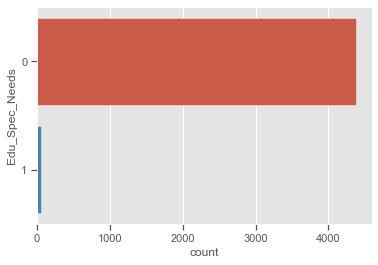

In [128]:
# What do the counts look like?
sns.countplot(y='Edu_Spec_Needs', data=df);

Text(0.5, 1.0, 'Distribution of Students with Special Needs')

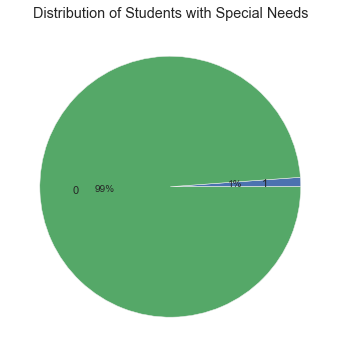

In [108]:
plt.figure(figsize=(6,6))
plt.pie(x=[51, 4373], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','g'])
plt.title('Distribution of Students with Special Needs')

### *Inference*

We can see from the plot that students who have special needs is 99% compared to those who do not have special needs


#### Feature: Debtor
Description:  Students who owes money. For easy analysis, we assume 0 to represents students who are not debtors and 1 to represents students who are debtors 

In [99]:
df.Debtor.value_counts()

0    3921
1     503
Name: Debtor, dtype: int64

Text(0.5, 1.0, 'Distribution of Students in Debts')

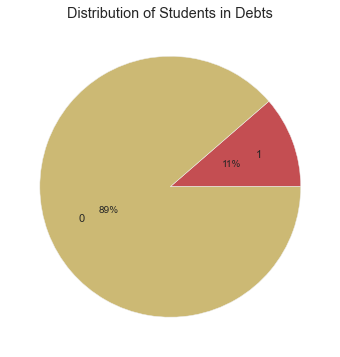

In [168]:
plt.figure(figsize=(6,6))
plt.pie(x=[503, 3921], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['r','y'])
plt.title('Distribution of Students in Debts')

 ### *Inference*

From the plot, it is shown that students who are not debtors is 89% which is more than those students who are debtors. 

#### Feature: Tui_Up_to_Date = Tuition_Fees_Up_to_Date 
Description:  Students who have their Tuition Fee up to date and those who do not have. For easy analysis, we assume that 0 represents students with Tuition fees not up to Date and 1 represents students with Tuition fees up to Date.

In [179]:
df.Tui_Up_to_Date.value_counts()

1    3896
0     528
Name: Tui_Up_to_Date, dtype: int64

Text(0.5, 1.0, 'Distribution of Students with Tuition Fees up to Date')

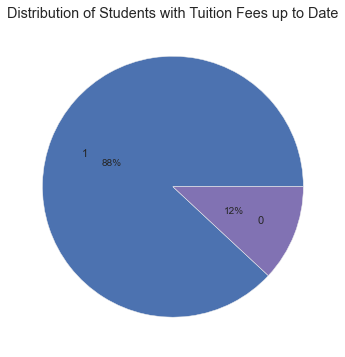

In [169]:
plt.figure(figsize=(6,6))
plt.pie(x=[3896, 528], labels=['1','0'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','m'])
plt.title('Distribution of Students with Tuition Fees up to Date')

### *Inference*

From the plot, it is shown that students with Tuition fees up to Date is more than students with Tuition fees not up to Date.



#### Feature: Gender 
Description:  The gender of Students, that is either Male or Female. For easy analysis we will assume that 0 represents female and 1 represents male.

In [112]:
df.Gender.value_counts()

0    2868
1    1556
Name: Gender, dtype: int64

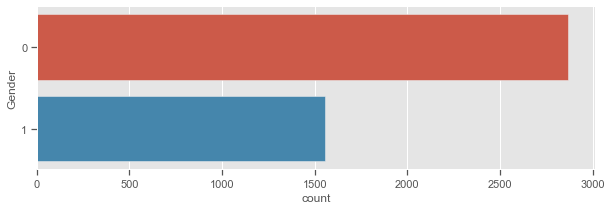

In [116]:
# Let's view the distribution of Gender
plt.figure(figsize=(10, 3))
sns.countplot(y="Gender", data=df);

### *Inference*

From the plot, it is shown that students who are female is more than students who are male.

####  Feature: S_Holder =  Scholarship_Holder 
Description: Student receiving financial aid to support their studies. For easy analysis, we will assume 0 represents non Scholarship Holder and 1 represents Scholarship Holder

In [180]:
df.S_Holder.value_counts()

0    3325
1    1099
Name: S_Holder, dtype: int64

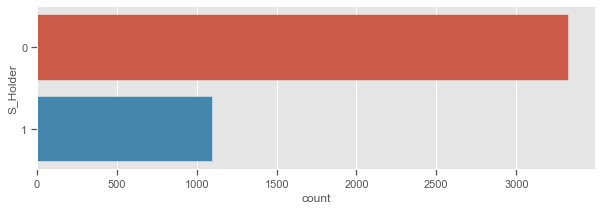

In [182]:
# Let's view the distribution of Scholarship_Holder?
plt.figure(figsize=(10, 3))
sns.countplot(y="S_Holder", data=df);

### *Inference*

From the plot, it is shown that students who are non Scholarship Holders are more than students who are Scholarship Holder.

#### Feature: Age_at_Enroll = Age_at_Enrollment 
Description:  The Age of Student at Enrollment.

In [183]:
df.Age_at_Enroll.value_counts()

18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
30      49
35      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
49      13
42      13
46      12
48      11
51       7
53       7
54       7
17       5
55       5
52       4
58       3
59       3
60       2
57       2
61       1
70       1
62       1
Name: Age_at_Enroll, dtype: int64

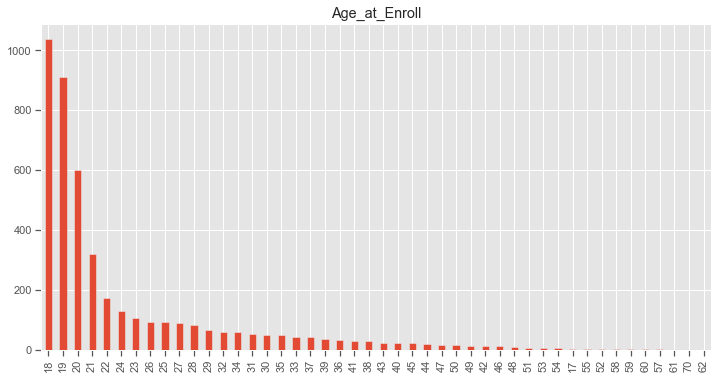

In [282]:
# ploting the bar chart for Age_at_Enroll
data['Age_at_Enroll'].value_counts().plot(kind = "bar", title = 'Age_at_Enroll', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

From the plot, it is shown that students who are age 18 are more followed age 19, and 20 compared to the rest. 

#### Feature: International  
Description: Students who come from other part of the world to study. For easy analysis, we assume that 0 represents  international student and 1 represents non-international students.

In [121]:
df.International.value_counts()

0    4314
1     110
Name: International, dtype: int64

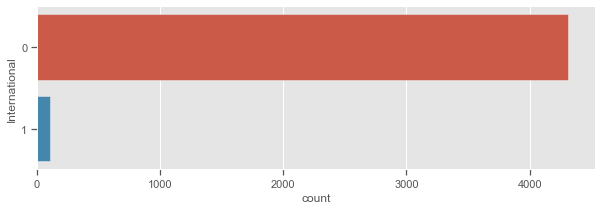

In [122]:
# Let's view the distribution of International Students?
plt.figure(figsize=(10, 3))
sns.countplot(y="International", data=df);

### *Inference*

From the plot, it is shown that international student is more the non-international students.

#### Feature: Cur_U_1st_Sem_Credit =  Curricular_Units_1st_Sem_Credited
Description: Curricular Credit units for Students in various course of study for the first semester

In [170]:
df.Cur_U_1st_Sem_Credit.value_counts()

0     3847
2       94
1       85
3       69
6       51
4       47
5       41
7       41
8       31
9       27
11      17
10      15
14      15
13      13
12      12
15       5
18       4
17       3
16       3
20       2
19       2
Name: Cur_U_1st_Sem_Credit, dtype: int64

#### Feature: Cur_U_1st_Sem_Enrol = Curricular_Units_1st_Sem_Enrolled
Description: Students enrolled in various units course of study for the first semester

In [187]:
df.Cur_U_1st_Sem_Enrol.value_counts()

6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: Cur_U_1st_Sem_Enrol, dtype: int64

#### Feature: Cur_U_1st_Sem_Eva = Curricular_Units_1st_Sem_Evaluations
Description: Students are evaluated to know how well they perform in their various unit course for the first semester. It is the process by which students are gauged to know the value and effectiveness of the various unit course taken in the first semester.

In [188]:
df.Cur_U_1st_Sem_Eva.value_counts()

8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
1       6
24      6
3       6
26      4
25      3
27      2
29      2
45      2
33      1
36      1
32      1
28      1
31      1
Name: Cur_U_1st_Sem_Eva, dtype: int64

#### Feature: Cur_U_1st_Sem_Appr = Curricular_Units_1st_Sem_Approved
Description: The various unit courses approved for students taken in the first semester.

In [192]:
df.Cur_U_1st_Sem_Appr.value_counts()

6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: Cur_U_1st_Sem_Appr, dtype: int64

#### Feature: Cur_U_1st_Sem_Grade = Curricular_Units_1st_Sem_Grade 
Description: The Grade in various unit courses for students taken in the first semester.

In [193]:
df.Cur_U_1st_Sem_Grade.value_counts()

0.000000     718
12.000000    205
13.000000    147
11.000000    138
11.500000     89
            ... 
13.828571      1
13.271667      1
16.153846      1
15.675714      1
15.888889      1
Name: Cur_U_1st_Sem_Grade, Length: 805, dtype: int64

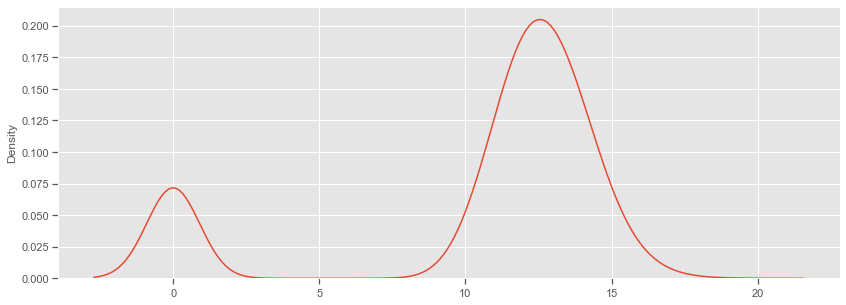

In [243]:
fig = plt.figure(figsize = (14,5))

sns.distplot(df[['Cur_U_1st_Sem_Grade']], hist = False)
plt.show()

#### Feature: Cur_U_1st_Sem_no_Eva = Curricular_Units_1st_Sem_Without_Evaluations
Description: Students are not evaluated to know how well they perform in their various unit course for the first semester. 

In [194]:
df.Cur_U_1st_Sem_no_Eva.value_counts()

0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: Cur_U_1st_Sem_no_Eva, dtype: int64

#### Feature: Cur_U_2nd_Sem_Credit = Curricular_Units_2nd_Sem_Credited 
Description: Curricular Credit units for Students in various course of study for the second semester

In [5]:
df.head()

,Marital_Status,Ap_Mode,Ap_Order,Course,Day_evening_att,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
df.groupby('Cur_U_1st_Sem_Credit')['Cur_U_1st_Sem_Grade'].agg('count')

Cur_U_1st_Sem_Credit
0     3847
1       85
2       94
3       69
4       47
5       41
6       51
7       41
8       31
9       27
10      15
11      17
12      12
13      13
14      15
15       5
16       3
17       3
18       4
19       2
20       2
Name: Cur_U_1st_Sem_Grade, dtype: int64

In [195]:
df.Cur_U_2nd_Sem_Credit.value_counts()

0     3894
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
16       2
18       2
15       2
19       1
Name: Cur_U_2nd_Sem_Credit, dtype: int64

#### Feature: Cur_U_2nd_Sem_Enrol = Curricular_Units_2nd_Sem_Enrolled
Description: Students enrolled in various units course of study for the second semester

In [196]:
df.Cur_U_2nd_Sem_Enrol.value_counts()

6     1913
5     1054
8      661
7      304
0      180
11      60
9       50
10      48
12      44
13      37
14      22
4       17
17      12
2        5
3        3
1        3
19       3
18       2
15       2
23       2
21       1
16       1
Name: Cur_U_2nd_Sem_Enrol, dtype: int64

#### Feature: Cur_U_2nd_Sem_Eva = Curricular_Units_2nd_Sem_Evaluations
Description: Students are evaluated to know how well they perform in their various unit course for the second semester. It is the process by which students are gauged to know the value and effectiveness of the various unit course taken in the second semester.

In [197]:
df.Cur_U_2nd_Sem_Eva.value_counts()

8     792
6     614
7     563
9     456
0     401
10    355
5     288
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
22     10
4      10
21     10
20      8
2       4
23      4
24      3
1       3
26      3
27      2
3       2
25      1
28      1
33      1
Name: Cur_U_2nd_Sem_Eva, dtype: int64

#### Feature: Cur_U_2nd_Sem_Approved = Curricular_Units_2nd_Sem_Approved
Description: The various unit courses approved for students taken in the second semester.

In [198]:
df.Cur_U_2nd_Sem_Approved.value_counts()

6     965
0     870
5     726
4     414
7     331
8     321
3     285
2     198
1     114
11     48
10     38
9      36
12     34
13     21
17      8
14      6
19      3
18      2
20      2
16      2
Name: Cur_U_2nd_Sem_Approved, dtype: int64

#### Feature: Cur_U_2nd_Sem_Grade =  Curricular_Units_2nd_Sem_Grade 
Description: The Grade in various unit courses for students taken in the second semester.

In [199]:
df.Cur_U_2nd_Sem_Grade.value_counts()

0.000000     870
12.000000    170
11.000000    165
13.000000    150
11.500000     86
            ... 
12.330000      1
16.075000      1
13.183333      1
13.657143      1
11.550000      1
Name: Cur_U_2nd_Sem_Grade, Length: 786, dtype: int64

#### Feature: Cur_U_2nd_Sem_no_Eva = Curricular_Units_2nd_Sem_Without_Evaluations
Description: Students are not evaluated to know how well they perform in their various unit course for the second semester. 

In [200]:
df.Cur_U_2nd_Sem_no_Eva.value_counts()

0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: Cur_U_2nd_Sem_no_Eva, dtype: int64

#### Feature: Unmp_R = Unemployment_Rate
Description: It measures the share of workers in the labor force who do not currently have a job but are actively looking for work.

In [201]:
df.Unmp_R.value_counts()

7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: Unmp_R, dtype: int64

<AxesSubplot:xlabel='Unmp_R', ylabel='Density'>

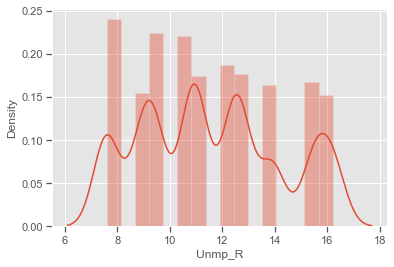

In [202]:
# ploting the distribution for Unmp_R
sns.distplot(df.Unmp_R)

#### Feature: Inf_R = Inflation_Rate
Description: The rate at which prices increase over time, resulting in a fall in the purchasing value of money.


In [203]:
df.Inf_R.value_counts()

 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: Inf_R, dtype: int64

<AxesSubplot:xlabel='Inf_R', ylabel='Density'>

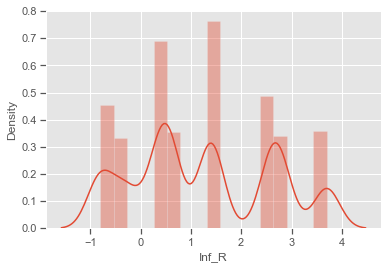

In [204]:
# ploting the distribution for Inf_R
sns.distplot(df.Inf_R)

#### Feature: GDP 
Description: The GDP measures the monetary value of goods and services produced within a country's borders in a given time period, usually a quarter or a year.

In [127]:
df.GDP.value_counts()

 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: GDP, dtype: int64

<AxesSubplot:xlabel='GDP', ylabel='Density'>

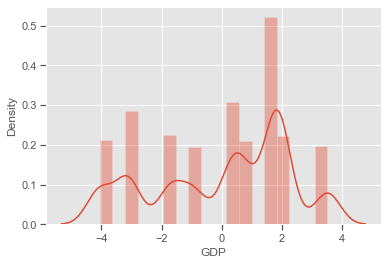

In [128]:
# ploting the distribution for GDP
sns.distplot(df.GDP)

### Bi-Variate Analysis

Text(0, 0.5, 'Frequency of Student Perfomance')

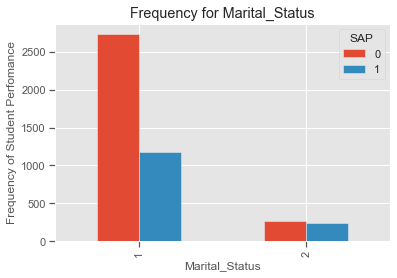

In [466]:
# Student performnce vs Marital Status
%matplotlib inline
pd.crosstab(df.Marital_Status,df.SAP).plot(kind='bar')
plt.title('Frequency for Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Frequency of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are from the single class will dropout and graduate more than those in the married class.

Text(0, 0.5, 'Proportion of Student Perfomance')

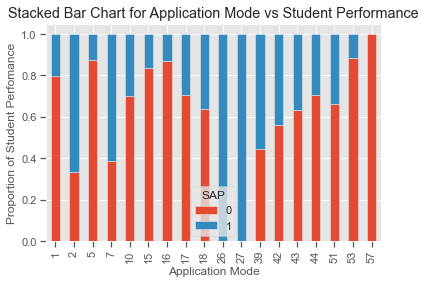

In [331]:
# Student performnce vs Ap_Mode
table=pd.crosstab(df.Ap_Mode,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Application Mode vs Student Performance')
plt.xlabel('Application Mode')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are from the 26-class and 27-class application mode will dropout than the rest. Also, those with the 57-class application mode are likely to graduate more than the rest. 

Text(0, 0.5, 'Proportion of Student Perfomance')

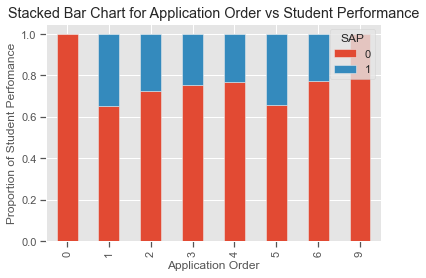

In [332]:
# Student performnce vs Ap_Order
table=pd.crosstab(df.Ap_Order,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Application Order vs Student Performance')
plt.xlabel('Application Order')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

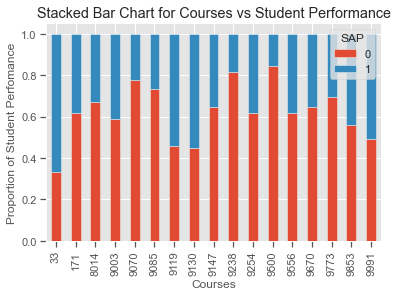

In [333]:
# Student performnce vs Course
table=pd.crosstab(df.Course,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Courses vs Student Performance')
plt.xlabel('Courses')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Frequency of Student Perfomance')

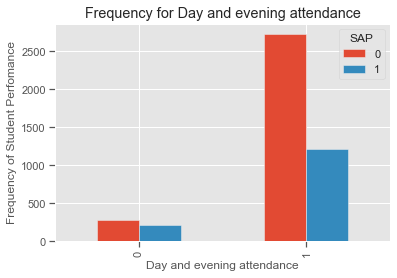

In [334]:
# Student performnce vs Attendance
%matplotlib inline
pd.crosstab(df.Attendance,df.SAP).plot(kind='bar')
plt.title('Frequency for Day and evening attendance')
plt.xlabel('Day and evening attendance')
plt.ylabel('Frequency of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are Day Attendance students are more likely to dropout than graduate than those who are Evening Attendance students.


Text(0, 0.5, 'Proportion of Student Perfomance')

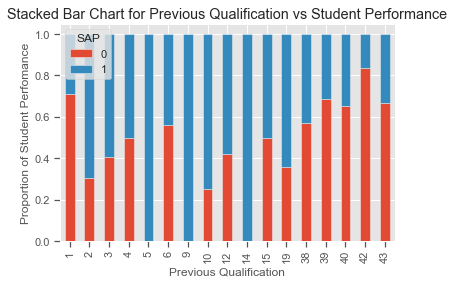

In [335]:
# Student performnce vs Prev_Qua
table=pd.crosstab(df.Prev_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Previous Qualification vs Student Performance')
plt.xlabel('Previous Qualification')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

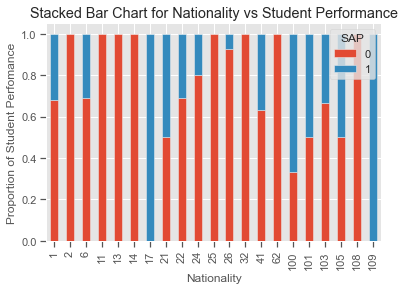

In [336]:
# Student performnce vs Nationality
table=pd.crosstab(df.Nationality,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Nationality vs Student Performance')
plt.xlabel('Nationality')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

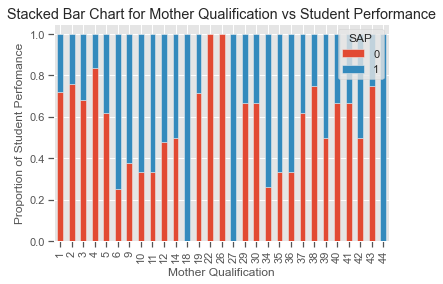

In [337]:
# Student performnce vs Mother_Qua
table=pd.crosstab(df.Mother_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Mother Qualification vs Student Performance')
plt.xlabel('Mother Qualification')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

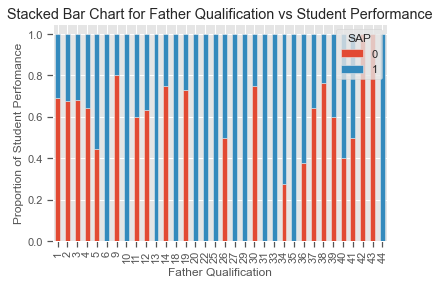

In [338]:
# Student performnce vs Father_Qua
table=pd.crosstab(df.Father_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Father Qualification vs Student Performance')
plt.xlabel('Father Qualification')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

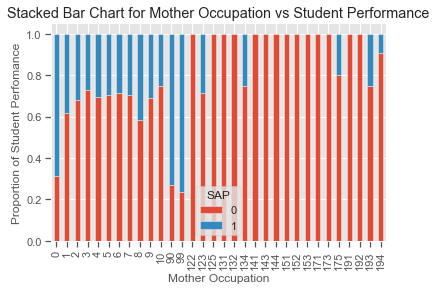

In [339]:
# Student performnce vs Mother_Occ
table=pd.crosstab(df.Mother_Occ,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Mother Occupation vs Student Performance')
plt.xlabel('Mother Occupation')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

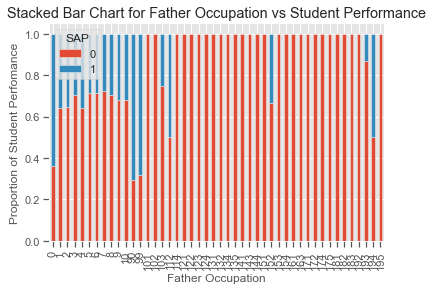

In [340]:
# Student performnce vs Father_Occ
table=pd.crosstab(df.Father_Occ,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Father Occupation vs Student Performance')
plt.xlabel('Father Occupation')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

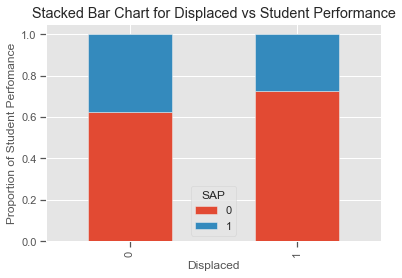

In [341]:
# Student performnce vs Displaced
table=pd.crosstab(df.Displaced,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Displaced vs Student Performance')
plt.xlabel('Displaced')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

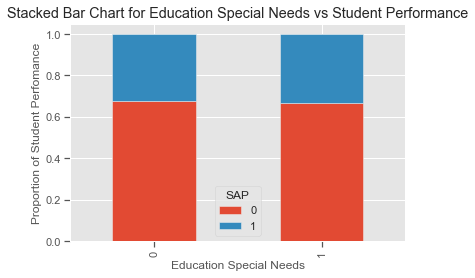

In [342]:
# Student performnce vs Edu_Spec_Needs
table=pd.crosstab(df.Edu_Spec_Needs,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Education Special Needs vs Student Performance')
plt.xlabel('Education Special Needs')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

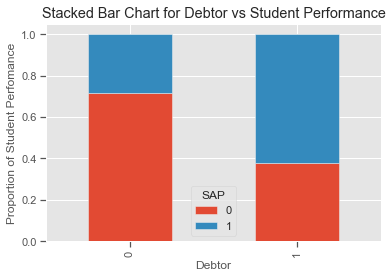

In [343]:
# Student performnce vs Debtor
table=pd.crosstab(df.Debtor,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Debtor vs Student Performance')
plt.xlabel('Debtor')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are debtors are more likely to dropout than graduate than those who are not.


Text(0, 0.5, 'Proportion of Student Perfomance')

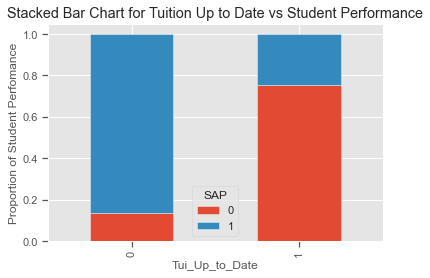

In [344]:
# Student performnce vs Tui_Up_to_Date
table=pd.crosstab(df.Tui_Up_to_Date,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Tuition Up to Date vs Student Performance')
plt.xlabel('Tui_Up_to_Date')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students whose Tuition is not Up to Date are more likely to dropout than graduate than those  whose Tuition is Up to Date.


Text(0, 0.5, 'Proportion of Student Perfomance')

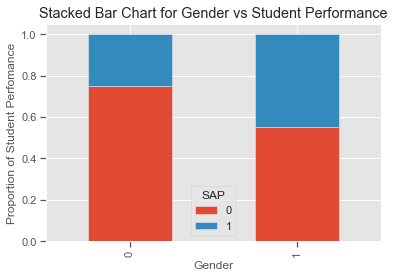

In [345]:
# Student performnce vs Gender
table=pd.crosstab(df.Gender,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Gender vs Student Performance')
plt.xlabel('Gender')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

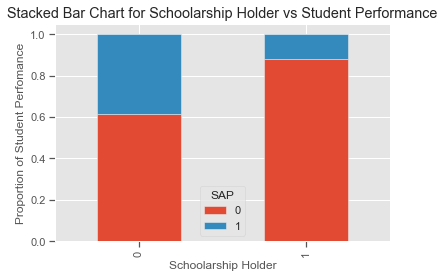

In [346]:
# Student performnce vs S_Holder
table=pd.crosstab(df.S_Holder,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Schoolarship Holder vs Student Performance')
plt.xlabel('Schoolarship Holder')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

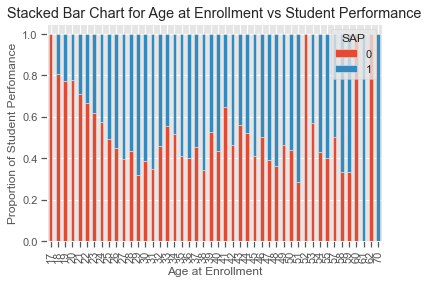

In [347]:
# Student performnce vs Age at Enrollment
table=pd.crosstab(df.Age_at_Enroll,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Age at Enrollment vs Student Performance')
plt.xlabel('Age at Enrollment')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

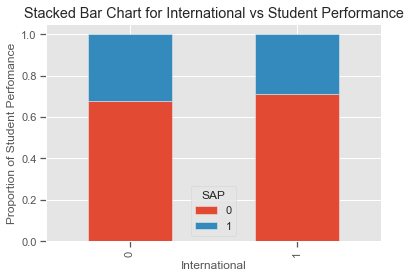

In [348]:
# Student performnce vs International
table=pd.crosstab(df.International,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for International vs Student Performance')
plt.xlabel('International')
plt.ylabel('Proportion of Student Perfomance')

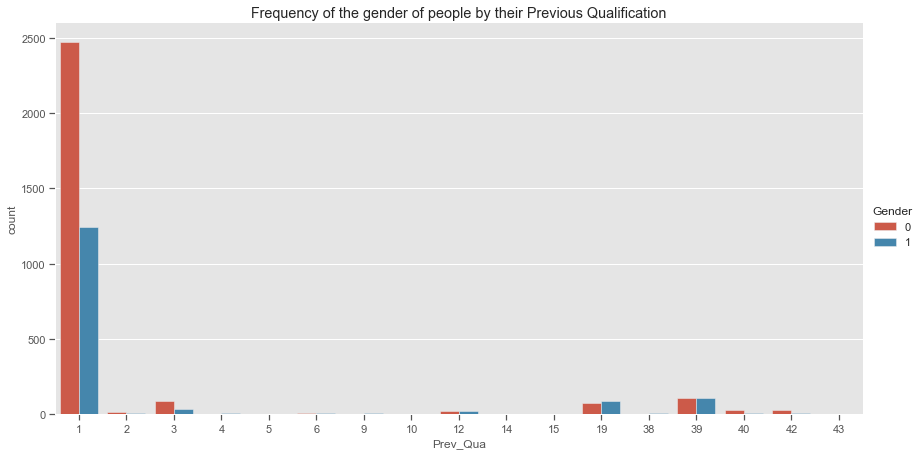

In [269]:
#Countplot showing the freqency of the gender of people by their Previous Qualification level
debtor_count = sns.catplot(x="Prev_Qua", hue = "Gender", kind="count", height=6, aspect=2, data = df)
plt.title("Frequency of the gender of people by their Previous Qualification")
plt.show()
debtor_count.savefig("debtor_count.png")

In [264]:
#The Gender level of those who are Dropout
df.groupby("SAP").get_group(0)["Gender"].value_counts()

0    720
1    701
Name: Gender, dtype: int64

In [305]:
df.groupby('Cur_U_1st_Sem_Grade').count()

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
Cur_U_1st_Sem_Grade,,,,,,,,,,,,,,,,,,,,,
0.000000,718,718,718,718,718,718,718,718,718,718,...,718,718,718,718,718,718,718,718,718,718
9.800000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10.000000,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
10.166667,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10.200000,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17.111111,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17.125000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17.333333,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [304]:
df.groupby('Cur_U_1st_Sem_Grade').mean()

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
Cur_U_1st_Sem_Grade,,,,,,,,,,,,,,,,,,,,,
0.000000,1.245125,22.224234,1.582173,6976.500000,0.869081,4.743733,132.738162,1.871866,20.153203,21.923398,...,0.006964,4.252089,3.261838,0.108635,0.689674,0.254875,11.564763,1.302368,-0.212159,0.313370
9.800000,1.000000,7.000000,1.000000,9556.000000,1.000000,2.000000,130.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,7.000000,0.000000,0.000000,0.000000,12.700000,3.700000,-1.700000,0.000000
10.000000,1.304878,22.878049,1.500000,9209.304878,0.817073,2.146341,128.231707,1.536585,23.414634,25.853659,...,0.012195,5.365854,9.024390,1.341463,7.560017,0.146341,10.904878,1.530488,-0.573659,0.292683
10.166667,1.000000,18.000000,1.000000,9238.000000,1.000000,1.000000,122.000000,1.000000,1.000000,3.000000,...,0.000000,6.000000,10.000000,6.000000,10.500000,0.000000,12.700000,3.700000,-1.700000,2.000000
10.200000,1.375000,15.000000,1.750000,9271.750000,0.875000,3.250000,128.637500,1.000000,26.250000,21.375000,...,0.000000,5.250000,8.000000,4.000000,11.456250,0.000000,12.250000,1.137500,0.002500,1.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17.111111,1.000000,7.000000,1.000000,9003.000000,1.000000,3.000000,130.000000,1.000000,3.000000,3.000000,...,2.000000,6.000000,9.000000,6.000000,15.571429,0.000000,13.900000,-0.300000,0.790000,2.000000
17.125000,1.000000,18.000000,1.000000,9500.000000,1.000000,1.000000,178.000000,1.000000,19.000000,1.000000,...,0.000000,8.000000,8.000000,8.000000,17.587500,0.000000,13.900000,-0.300000,0.790000,2.000000
17.333333,1.000000,22.000000,1.000000,9119.000000,1.000000,1.000000,154.000000,1.000000,28.000000,28.500000,...,0.000000,5.000000,9.500000,3.000000,17.785714,0.000000,13.150000,0.100000,1.290000,1.000000


In [234]:
df.groupby('Cur_U_1st_Sem_Grade', as_index=False).agg({"Cur_U_2nd_Sem_Grade": "sum"})

,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Grade
0,0.000000,495.185714
1,9.800000,0.000000
2,10.000000,619.921429
3,10.166667,10.500000
4,10.200000,91.650000
...,...,...
800,17.111111,15.571429
801,17.125000,17.587500
802,17.333333,35.571429
803,18.000000,26.333333


In [350]:
df.groupby('Ap_Mode')['Course'].sum()

Ap_Mode
1     14760392
2        28147
5       140536
7      1256548
10       94083
15      261775
16      298149
17     7850433
18     1134858
26        9147
27        9070
39     7131778
42      709228
43     2785999
44     1871488
51      518423
53      311742
57        9991
Name: Course, dtype: int64

In [208]:
df.groupby('Age_at_Enroll')['Adm_Grade'].sum()

Age_at_Enroll
17       682.1
18    134988.7
19    114834.6
20     74892.4
21     40298.8
22     22078.7
23     13776.6
24     16457.4
25     11684.9
26     11870.6
27     11698.7
28     10467.8
29      8259.0
30      6203.3
31      7005.1
32      7526.8
33      5670.0
34      7598.1
35      6138.4
36      4402.8
37      5186.3
38      3578.2
39      4715.4
40      2901.7
41      3833.0
42      1554.4
43      3399.9
44      2734.3
45      2904.5
46      1443.0
47      2497.0
48      1300.2
49      1676.1
50      1998.1
51       954.0
52       491.8
53       917.0
54       877.2
55       608.4
57       274.0
58       375.5
59       401.9
60       240.0
61       135.1
62       103.0
70       116.4
Name: Adm_Grade, dtype: float64

### *Inference*

The average age of students who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [353]:
# How many Student dropped out because their Tution was not up to date  
df.groupby("SAP").get_group(1)["Tui_Up_to_Date"].value_counts()

1    964
0    457
Name: Tui_Up_to_Date, dtype: int64

In [354]:
# student who grauduated because their  
df.groupby("SAP").get_group(0)["Tui_Up_to_Date"].value_counts()

1    2932
0      71
Name: Tui_Up_to_Date, dtype: int64

#### Feature selection
Feature selection is choosing the best set of features for predictions


<AxesSubplot:>

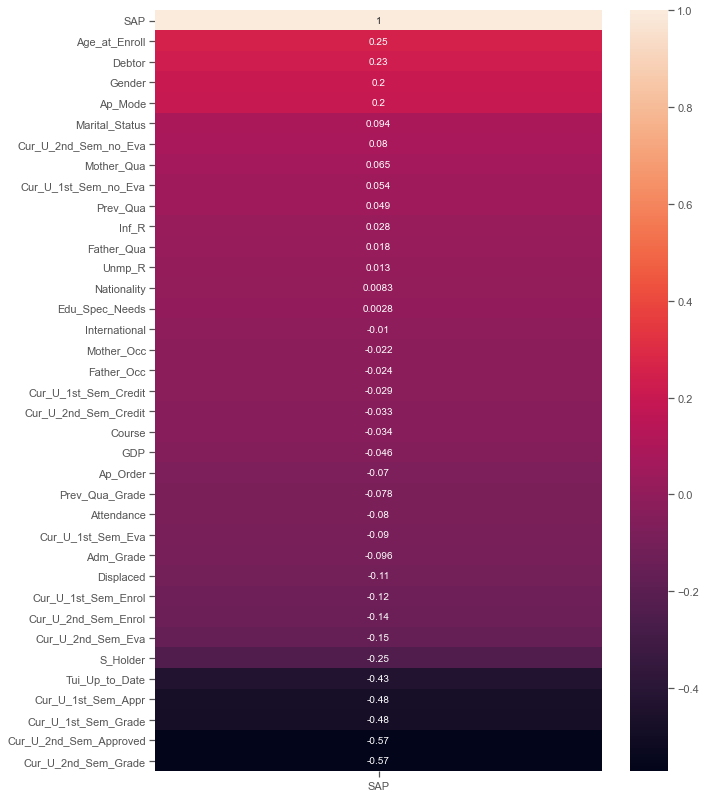

In [356]:
# getting the correlation values using Pearson's method and then visualize the correlations using Heatmap
fig, ax = plt.subplots(figsize=(10,14))
df_corr = df.corr()[['SAP']].sort_values(
    by='SAP', ascending=False)
sns.heatmap(df_corr, annot=True, ax=ax)

[0.01152898 0.05882643 0.03723671 0.07311319 0.01025568 0.02418585
 0.07960163 0.00793533 0.05826301 0.05810425 0.06744709 0.07331517
 0.08656843 0.02212225 0.00449584 0.03109866 0.13435062 0.02880342
 0.0407745  0.09197298]


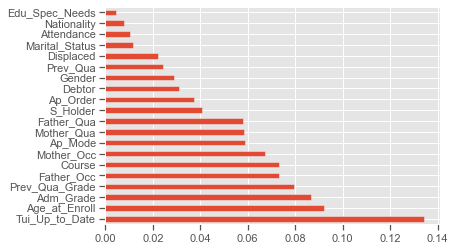

In [469]:
# Performing Feature Importance on each variable
# Feature importance gives a score for each feature in dataset, the higher the score the relevant is the feature.

data = df
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e Student Performance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [301]:
# creating  correlation matrix for the columns in the dataset and an empty set that will contain all the correlated features
correlated_features = set()
correlation_matrix = df.corr()

In [302]:
# looping through all the columns in the correlation matrix.
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7: # adding the columns with a correlation value of 0.7 to the
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [303]:
# checking the total length of correlated columns in our dataset
len(correlated_features)

9

In [304]:
# printing the names of the correlated features
print(correlated_features)

{'Cur_U_2nd_Sem_Grade', 'International', 'Cur_U_2nd_Sem_Eva', 'Cur_U_2nd_Sem_Credit', 'Cur_U_1st_Sem_Enrol', 'Cur_U_2nd_Sem_Approved', 'Father_Occ', 'Cur_U_1st_Sem_Appr', 'Cur_U_2nd_Sem_Enrol'}


### *Model*

The modelling phase consists of applying different machine learning techniques to the dataset. The goal of the prediction is to create a model based on the students’ current activities and accomplishments that attempts to predict learner failure and future performance. It is a typical classification problem, which a multi classification model can solve in order to predict whether a student can complete the programe or not, that is, whether a student will graduate or not.

We will choose a model that is relevant to the task at hand. Since it is a classification problem, the model selected will be one suited for the categorical data.

In [322]:
# Selecting the features to be used for modelling
new_feature=['Marital_Status', 'Course', 'Attendance','Prev_Qua', 'Prev_Qua_Grade', 'Nationality', 
        'Mother_Qua','Father_Qua','Adm_Grade', 'Tui_Up_to_Date', 'Gender', 'S_Holder', 
        'Age_at_Enroll','Cur_U_1st_Sem_Credit', 'Cur_U_1st_Sem_Appr', 'Cur_U_1st_Sem_Grade',
        'Cur_U_2nd_Sem_Credit', 'Cur_U_2nd_Sem_Approved', 'Cur_U_2nd_Sem_Grade','SAP'] 

In [470]:
# Importing Machine learning Library

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from time import sleep
import random
import time
import datetime
import warnings
warnings.filterwarnings('ignore')

In [471]:
# Split into input and output features
y = df["SAP"]
X = df[['Marital_Status', 'Course', 'Attendance','Prev_Qua', 'Prev_Qua_Grade', 'Nationality', 
        'Mother_Qua','Father_Qua','Adm_Grade', 'Tui_Up_to_Date', 'Gender', 'S_Holder', 
        'Age_at_Enroll','Cur_U_1st_Sem_Credit', 'Cur_U_1st_Sem_Appr', 'Cur_U_1st_Sem_Grade',
        'Cur_U_2nd_Sem_Credit', 'Cur_U_2nd_Sem_Approved', 'Cur_U_2nd_Sem_Grade']]
X.head()

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Appr,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade
0,1,171,1,1,122.0,1,19,12,127.3,1,1,0,20,0,0,0.000000,0,0,0.000000
1,1,9254,1,1,160.0,1,1,3,142.5,0,1,0,19,0,6,14.000000,0,6,13.666667
2,1,9070,1,1,122.0,1,37,37,124.8,0,1,0,19,0,0,0.000000,0,0,0.000000
3,1,9773,1,1,122.0,1,38,37,119.6,1,0,0,20,0,6,13.428571,0,5,12.400000
4,2,8014,0,1,100.0,1,37,38,141.5,1,0,0,45,0,5,12.333333,0,6,13.000000


In [472]:
# Splitting the data into train and test. 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((3539, 19), (885, 19))

In [473]:
X_train

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Appr,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade
3383,2,9147,1,3,130.0,1,19,1,130.0,1,0,0,35,0,0,0.000000,0,0,0.000000
2840,1,9085,1,1,130.0,1,37,37,110.0,1,0,1,25,0,3,11.666667,0,2,11.333333
564,1,9070,1,6,119.0,1,1,1,123.2,1,1,0,22,0,6,14.166667,0,6,13.625000
1786,2,9238,1,19,133.1,1,37,37,103.5,1,1,0,42,0,0,0.000000,0,0,0.000000
3900,1,9500,1,1,142.0,1,37,38,137.3,1,0,1,22,0,6,13.900000,0,6,13.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1,9070,1,1,134.0,1,1,19,127.7,0,0,0,18,1,6,11.714286,0,4,11.333333
466,1,9853,1,1,133.0,1,1,38,131.3,1,0,0,20,0,5,14.333333,4,8,12.625000
3092,1,8014,0,1,100.0,1,38,19,112.8,1,0,1,23,0,6,14.166667,0,6,12.500000
3772,1,9238,1,1,127.0,1,1,38,120.4,1,0,1,19,0,6,13.500000,0,6,13.428571


In [425]:
X_test

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Appr,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade
1255,4,9130,1,1,133.1,1,3,1,110.0,1,0,1,30,0,0,0.000000,0,1,10.000000
3458,1,9238,1,1,125.0,1,4,3,119.8,1,0,0,18,0,5,11.571429,0,6,12.142857
3390,1,9853,1,1,133.0,1,38,38,127.4,1,0,1,18,0,7,12.714286,0,7,12.285714
1497,1,9670,1,1,110.0,1,1,1,115.3,1,1,0,19,0,6,13.857143,0,5,13.000000
1536,1,9500,1,1,130.0,1,37,19,106.2,1,0,0,27,0,0,0.000000,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,1,9500,1,1,136.0,1,19,38,123.0,1,0,0,19,0,7,14.328571,0,7,14.328571
3281,2,8014,0,3,130.0,1,35,35,140.0,0,0,0,59,10,12,13.333333,8,8,12.875000
436,1,9254,1,1,122.0,1,19,19,118.2,1,0,1,20,0,4,11.250000,0,6,10.500000
1434,1,9500,1,1,130.0,1,1,38,125.1,1,0,1,18,0,6,12.816667,0,6,12.875000


In [424]:
y_train

3383    1
2840    0
564     0
1786    1
3900    0
       ..
3444    1
466     0
3092    0
3772    0
860     1
Name: SAP, Length: 3539, dtype: int64

In [426]:
y_test

1255    1
3458    0
3390    0
1497    0
1536    1
       ..
3162    0
3281    1
436     0
1434    0
1361    0
Name: SAP, Length: 885, dtype: int64

## Implementing The Classification Models

We will build Six models and compare their accuracy scores.

In [474]:
# We will define a function to fit our machine learning algorithms. 
# This will prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

# Function that runs through the selected algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

###  1. Gaussian Naive Bayes

In [475]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 83.58
Accuracy CV 10-Fold: 83.39
Running Time: 0:00:19.537827


### *Inference*

The Accuracy Score gives 83.58 which means that the model has performed 84%*

### 2. Linear SVC

In [421]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 78.69
Accuracy CV 10-Fold: 75.73
Running Time: 0:00:19.175364


### *Inference*

The Accuracy Score gives 78.69 which means that the model has performed 79%*

### 3. Decision Tree Classifier

In [422]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 81.46
Running Time: 0:00:00.640979


### *Inference*


The Accuracy Score gives 100 which means that the model has performed really well. That is, it performed 100%

### 4. Logistic Regression

In [476]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 83.75
Accuracy CV 10-Fold: 83.58
Running Time: 0:00:00.943269


### *Inference*


The Accuracy Score gives 83.91 which means that the model has performed 84%

### 5. k-Nearest Neighbours

In [477]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.95
Accuracy CV 10-Fold: 78.04
Running Time: 0:00:01.776464


### *Inference*

The Accuracy Score gives 84.13 which means that the model has performed 84%*

In [436]:
# View the data for the CatBoost model
X_train.head()

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Nationality,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Appr,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade
3383,4,9147,1,3,130.0,1,19,1,130.0,1,0,0,35,0,0,0.000000,0,0,0.000000
2840,1,9085,1,1,130.0,1,37,37,110.0,1,0,1,25,0,3,11.666667,0,2,11.333333
564,1,9070,1,6,119.0,1,1,1,123.2,1,1,0,22,0,6,14.166667,0,6,13.625000
1786,2,9238,1,19,133.1,1,37,37,103.5,1,1,0,42,0,0,0.000000,0,0,0.000000
3900,1,9500,1,1,142.0,1,37,38,137.3,1,0,1,22,0,6,13.900000,0,6,13.900000


In [437]:
# View the labels for the CatBoost model
y_train.head()

3383    1
2840    0
564     0
1786    1
3900    0
Name: SAP, dtype: int64

In [439]:
# Using the CatBoost Pool() function to pool together the training data and feature labels
train_pool = Pool(X_train, 
                  y_train)

In [440]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.017673
0:	learn: 0.6787793	total: 350ms	remaining: 5m 49s
1:	learn: 0.6654324	total: 358ms	remaining: 2m 58s
2:	learn: 0.6519636	total: 379ms	remaining: 2m 5s
3:	learn: 0.6392001	total: 386ms	remaining: 1m 36s
4:	learn: 0.6262895	total: 509ms	remaining: 1m 41s
5:	learn: 0.6161411	total: 515ms	remaining: 1m 25s
6:	learn: 0.6050344	total: 540ms	remaining: 1m 16s
7:	learn: 0.5939060	total: 548ms	remaining: 1m 7s
8:	learn: 0.5841505	total: 558ms	remaining: 1m 1s
9:	learn: 0.5735281	total: 565ms	remaining: 55.9s
10:	learn: 0.5642799	total: 605ms	remaining: 54.4s
11:	learn: 0.5553159	total: 628ms	remaining: 51.7s
12:	learn: 0.5463561	total: 635ms	remaining: 48.2s
13:	learn: 0.5387185	total: 661ms	remaining: 46.5s
14:	learn: 0.5308601	total: 670ms	remaining: 44s
15:	learn: 0.5232458	total: 679ms	remaining: 41.8s
16:	learn: 0.5151441	total: 689ms	remaining: 39.9s
17:	learn: 0.5078339	total: 702ms	remaining: 38.3s
18:	learn: 0.5007650	total: 710ms	remaining: 36.7s
19:	lea

In [442]:
y_train.head()

3383    1
2840    0
564     0
1786    1
3900    0
Name: SAP, dtype: int64

In [443]:
 # Time taken?
start_time = time.time()

# params for cross-validation set same as the initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# Time taken?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6706827	test: 0.6715084	best: 0.6715084 (0)	total: 48ms	remaining: 48s
1:	learn: 0.6467663	test: 0.6479248	best: 0.6479248 (1)	total: 53.6ms	remaining: 26.8s
2:	learn: 0.6252471	test: 0.6263467	best: 0.6263467 (2)	total: 60.6ms	remaining: 20.1s
3:	learn: 0.6056244	test: 0.6065486	best: 0.6065486 (3)	total: 67.2ms	remaining: 16.7s
4:	learn: 0.5864569	test: 0.5874058	best: 0.5874058 (4)	total: 74.1ms	remaining: 14.8s
5:	learn: 0.5720721	test: 0.5721187	best: 0.5721187 (5)	total: 77.9ms	remaining: 12.9s
6:	learn: 0.5582997	test: 0.5580007	best: 0.5580007 (6)	total: 84.6ms	remaining: 12s
7:	learn: 0.5444739	test: 0.5439910	best: 0.5439910 (7)	total: 91ms	remaining: 11.3s
8:	learn: 0.5315927	test: 0.5310751	best: 0.5310751 (8)	total: 96.5ms	remaining: 10.6s
9:	learn: 0.5189076	test: 0.5175098	best: 0.5175098 (9)	total: 103ms	remaining: 10.2s
10:	learn: 0.5061970	test: 0.5052140	best: 0.5052140 (10)	total: 109ms	remaining: 9.84s
11:	learn: 0.4956144	test: 

In [444]:
# Printing out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 93.42
Accuracy cross-validation 10-Fold: 87.99
Running Time: 0:02:41.541267


#### *Inference*

For our model, we have got 93.42 which means our model is approximately 93% accurate.

### *Model Results*

Which model had the best accuracy?

Which model had the best cross-validation accuracy?

In [445]:
# Regular accuracy scores
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Linear SVC', 'Decision Tree','CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian,  
        acc_linear_svc, 
        acc_dt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
4,Decision Tree,100.00
5,CatBoost,93.42
0,KNN,84.13
1,Logistic Regression,83.91
2,Naive Bayes,83.22
3,Linear SVC,78.69


### *Inference*

From the above model results, we can conclude the following:

The Decision Tree classifier  has the highest score.

The Linear SVC has the lowest score among all classifiers.

In [446]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Linear SVC', 'Decision Tree',  'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian,  
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
5,CatBoost,87.99
2,Naive Bayes,83.27
1,Logistic Regression,82.87
4,Decision Tree,81.46
0,KNN,77.10
3,Linear SVC,75.73


### *Inference*

From the above model results, we can conclude the following:

The CatBoost has the highest cross-validation accuracy score.

The Linear SVC has the lowest cross-validation accuracy among all classifiers.

Note: We care most about cross-validation metrics because the metrics we get from .fit() can randomly score higher than usual.

In [449]:
# checking for feature importance
def feature_importance(model, df):
    """
    Function that shows the most important features in the model.
    ::param_model:: model to use?
    ::param_data:: data to use?
    """
    feat_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': df.columns})
    feat_imp = feat_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = feat_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return feat_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
5,0.502999,Nationality
0,0.768865,Marital_Status
2,0.829911,Attendance
3,1.491118,Prev_Qua
10,1.730937,Gender
13,1.811844,Cur_U_1st_Sem_Credit
11,1.879529,S_Holder
16,2.520728,Cur_U_2nd_Sem_Credit
6,3.653758,Mother_Qua
7,4.690239,Father_Qua


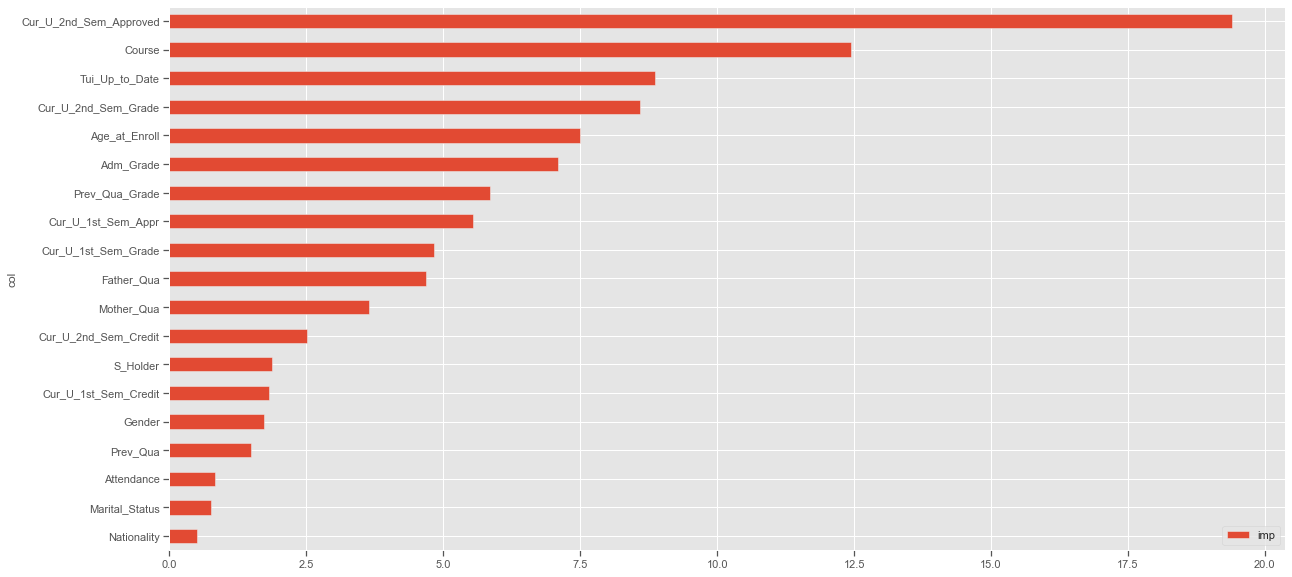

In [450]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

### *Inference*

from the Feature importance plot, we can see the features of the data that are most important or that contribuite more to our machine learing model. 

## Evaluating the Model Performance

Understanding how well a machine learning model will perform is the main purpose behind working with evaluation metrics. Metrics like accuracy, precision, recall will be used to evaluate classification models for our balanced datasets and help it perform better in evaluating the model performance.

In [478]:
 metrics = ['Precision', 'Recall', 'F1']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.9133022780390968
Recall: 0.7801574660633486
F1: 0.8412478507024181


### *Inference*

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all Student that that labeled as Graduated, how many actually Graduated? High precision relates to the low false positive rate. We have got 0.913 precision which is good enough.

Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the Student that truly are Graduate, how many did we label? We have got recall of 0.780 which is good for this model as it’s above 0.5.

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account, F1 is usually more useful than accuracy, especially if you have an uneven class distribution. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.841.